In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_df = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText
schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [6]:
schema_df['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [7]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]


In [8]:
len(selected_columns)

20

In [9]:
survey_df = survey_raw_df[selected_columns].copy()

In [10]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [12]:
survey_df.isna().sum()

Country                     389
Age                       19015
Gender                    13904
EdLevel                    7030
UndergradMajor            13466
Hobbyist                     45
Age1stCode                 6561
YearsCode                  6777
YearsCodePro              18112
LanguageWorkedWith         7083
LanguageDesireNextYear    10348
NEWLearn                   8305
NEWStuck                   9478
Employment                  607
DevType                   15091
WorkWeekHrs               23310
JobSat                    19267
JobFactors                15112
NEWOvertime               21230
NEWEdImpt                 15996
dtype: int64

In [13]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [14]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [15]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [16]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


As it is logical that 1 year child as well as 100 year old person can not do the coding so we have to drop those rows..

Additionally, aperson can not work more than 140 hours( 20 hours/day) so we can also drop the rows which is more than 140.

In [18]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age>100].index, inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace= True)

In [19]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [20]:
survey_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

We will not focus on last four genders to make analysis easy and more effective.

In [21]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [22]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [24]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
63828,Romania,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
31833,Russian Federation,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,15.0,26.0,20.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,C++;HTML/CSS;JavaScript;Perl,Once a decade,Go for a walk or other physical activity,Employed full-time,"Academic researcher;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Specific depa...,Occasionally: 1-2 days per quarter but less th...,Critically important
40152,United States,NaN,NaN,Some college/university study without earning ...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
29493,United Kingdom,65.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,48.0,42.0,C#,C#;Python,Once a decade,Visit Stack Overflow,Employed part-time,"Developer, QA or test",NaN,NaN,NaN,NaN,Fairly important
7970,Poland,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,15.0,5.0,NaN,C;C++;Go;Haskell;HTML/CSS;JavaScript;Python;Ru...,Go;Python;SQL,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, back-end",50.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Fairly important
62858,France,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
30081,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,8.0,5.0,Bash/Shell/PowerShell;JavaScript;Python;Rust;SQL,Bash/Shell/PowerShell;Python;Rust;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",50.0,Slightly satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Somewhat important
2783,United States,27.0,Man,Primary/elementary school,NaN,Yes,21.0,6.0,5.0,HTML/CSS;JavaScript;PHP;SQL,NaN,NaN,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Not at all important/not necessary
35928,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37038,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Fairly important


In [26]:
survey_df.info()
survey_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 64306 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63950 non-null  object 
 6   Age1stCode              57027 non-null  float64
 7   YearsCode               56339 non-null  float64
 8   YearsCodePro            43794 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63394 non-null  object 
 14  DevType                 48983 non-null  obj

Country                     700
Age                       19238
Gender                    14191
EdLevel                    7325
UndergradMajor            13687
Hobbyist                    356
Age1stCode                 7279
YearsCode                  7967
YearsCodePro              20512
LanguageWorkedWith         7374
LanguageDesireNextYear    10618
NEWLearn                   8576
NEWStuck                   9769
Employment                  912
DevType                   15323
WorkWeekHrs               23493
JobSat                    19471
JobFactors                15365
NEWOvertime               21430
NEWEdImpt                 16214
dtype: int64

# Exploratory Analysis and visualization

In [27]:
sns.set_style('darkgrid');
plt.rcParams['font.size'] = 14;
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = '#00000000';

## Country

number of countrie in the survey and plotting top 10 countires with the highest number of response

In [28]:
survey_df.Country

0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64306, dtype: object

In [29]:
survey_df.Country.nunique()

183

In [33]:
top_countires = survey_df.Country.value_counts().head(15)
top_countires

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

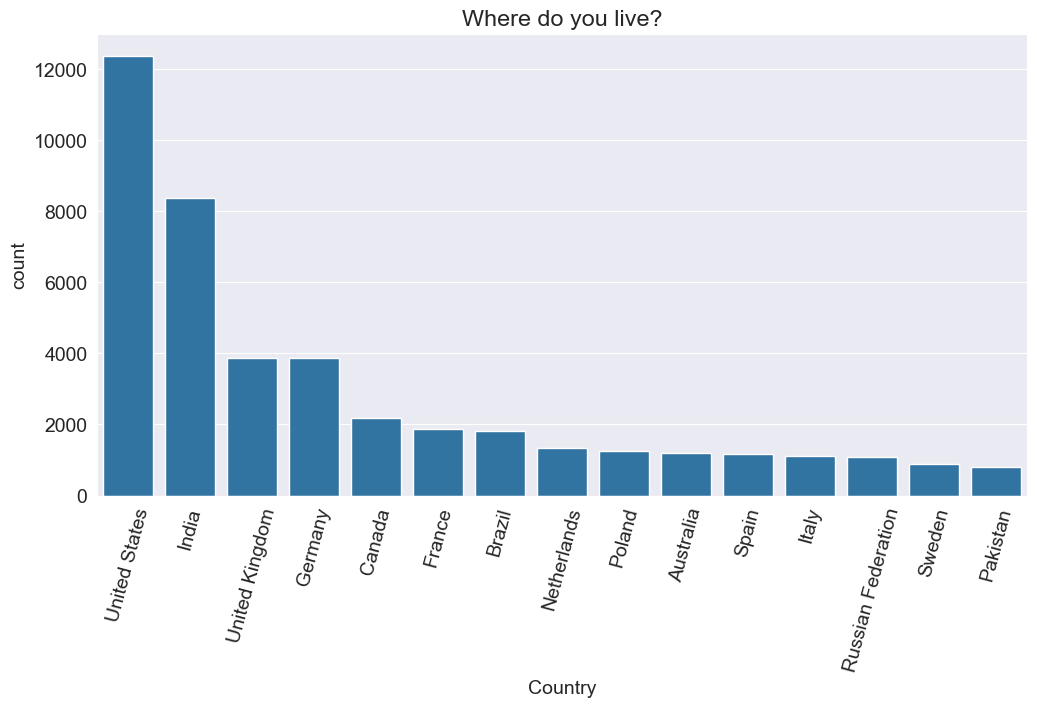

In [61]:
plt.figure(figsize=(12,6));
plt.xticks(rotation = 75);
plt.title(schema_df.Country)
sns.barplot(x= top_countires.index, y= top_countires)

fig = px.bar(data_frame=top_countires, x= top_countires.index, y= top_countires, title=schema_df.Country)
fig.show()

In [43]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

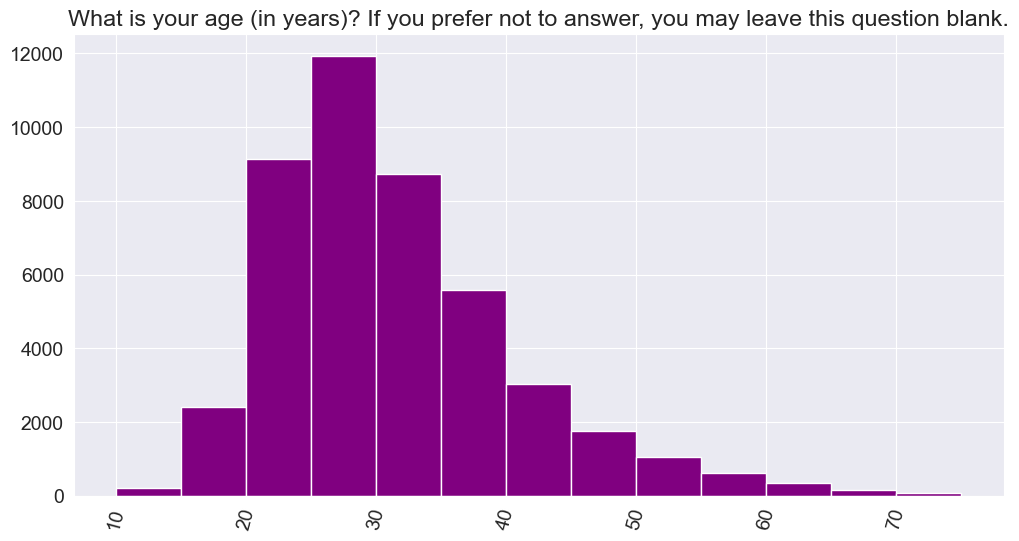

In [63]:
plt.figure(figsize=(12,6));
plt.xticks(rotation = 75);
plt.title(schema_df.Age);

fig = px.histogram(data_frame=survey_df, x= ['Age'], title=schema_df.Age)
fig.update_xaxes(tickvals = np.arange(10, 80, 5))
fig.show()
plt.hist(survey_df.Age, bins =np.arange(10, 80, 5), color ='purple');

In [87]:
conditions = [
    (survey_df['Age'] < 10),
    (survey_df['Age'] >= 10) & (survey_df['Age'] < 18),
    (survey_df['Age'] >= 18) & (survey_df['Age'] < 30),
    (survey_df['Age'] >= 30) & (survey_df['Age'] < 45),
    (survey_df['Age'] >= 45) & (survey_df['Age'] < 60)
]

# Corresponding labels for each condition
choices = [
    'Less than 10 years',
    '10-18 years',
    '18-30 years',
    '30-45 years',
    '45-60 years'
]

default = '60 years +'

# Create the new column using np.select
survey_df['AgeGroup'] = np.select(conditions, choices, default=default)

In [88]:
ageGroup_counts = survey_df.AgeGroup.value_counts()
ageGroup_counts
schema_df['AgeGroup'] = 'In which group user fall into'

In [89]:
fig  = px.bar(data_frame=ageGroup_counts, x= ageGroup_counts.index, y= ageGroup_counts, title=schema_df.AgeGroup)
fig.show()

In [65]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [66]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [72]:
fig  = px.pie(data_frame=gender_counts, values = gender_counts, names=gender_counts.index, title=schema_df.Gender)
fig.show()